# ANN using Keras

In this part we will be using Keras library to build the ANN model for chess problem.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('chesscom_games_no_draws.csv')

In [3]:
df.head(3)

,Unnamed: 0,Event,Site,Date,Round,Time Control,Time,Color,Opening move,Opponent,Opponent location,Current Rank,Opponent Rank,Result,Reason,Hour,Previously played that day
0,0,Live Chess,Chess.com,2018.08.15,-,180+2,22:34:39,White,e4,Lillyandmarcus,United States,614,736,Lost,Resignation,22,0
1,1,Live Chess,Chess.com,2018.09.18,-,180+2,15:34:13,White,d4,TheGod1092,United States,741,537,Won,Checkmate,15,0
2,2,Live Chess,Chess.com,2018.09.18,-,180+2,17:28:39,Black,e4,joseinstein,International,666,887,Lost,Resignation,17,1


Creating the Rank difference column and dummy variables for Color and Cime Control columns; also replacing the string value to a numeric value in the Result column:

In [4]:
df['Rank difference'] = df['Current Rank'] - df['Opponent Rank']
df.drop(['Unnamed: 0', 'Event','Site','Date','Round','Time',
         'Opponent','Opponent location','Opening move','Reason', 'Current Rank'], 
        axis=1,inplace=True)
df['Time Control'] = df['Time Control'].apply(lambda x: 0 if x == '300+5' else 1)
df['Result'] = df['Result'].apply(lambda x: 0 if x == 'Won' else 1)
df['Color'] = df['Color'].apply(lambda x: 0 if x == 'White' else 1)

Removing white spaces from the column names and perfoming Feature scaling:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Result',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
df.columns = ['Time_Control','Color','Opponent_Rank','Result','Hour','Previously_played_that_day','Rank_difference']
scaled_features = scaler.fit_transform(df.drop('Result',axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[[0,1,2,4,5,6]])
df_feat.head()

,Time_Control,Color,Opponent_Rank,Hour,Previously_played_that_day,Rank_difference
0,2.336615,-0.985865,-0.303326,1.165555,-0.910811,-1.234530
1,2.336615,-0.985865,-1.937241,0.117248,-0.910811,2.532951
2,2.336615,1.014338,0.936479,0.416765,-0.825405,-2.378642
3,2.336615,1.014338,-0.336168,0.416765,-0.740000,-1.488777
4,2.336615,-0.985865,-1.206495,0.416765,-0.654595,-1.072736


Make sure there is no missing data:

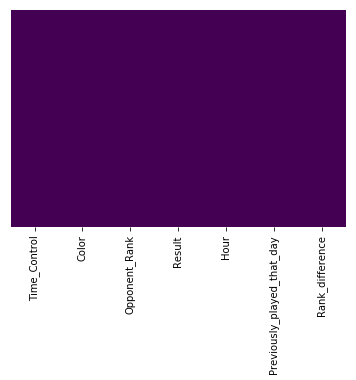

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Selecting our depentent and independent variables and splitting the dataset into test set and training set:

In [9]:
X = df_feat
y = df['Result']

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creating the ANN:

In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
/Users/puzanov/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [12]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu', input_dim = 6))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 20, nb_epoch = 50)

/Users/puzanov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=6, kernel_initializer="uniform", units=15, activation="relu")`
/Users/puzanov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, kernel_initializer="uniform", activation="sigmoid")`
/Users/puzanov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="uniform", activation="sigmoid")`
/Users/puzanov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/50
786/786 [==============================] - 0s 629us/step - loss: 0.6932 - acc: 0.5000
Epoch 2/50
786/786 [==============================] - 0s 102us/step - loss: 0.6930 - acc: 0.5254
Epoch 3/50
786/786 [==============================] - 0s 131us/step - loss: 0.6920 - acc: 0.5827
Epoch 4/50
786/786 [==============================] - 0s 245us/step - loss: 0.6892 - acc: 0.6552
Epoch 5/50
786/786 [==============================] - 0s 206us/step - loss: 0.6826 - acc: 0.6654
Epoch 6/50
786/786 [==============================] - 0s 127us/step - loss: 0.6708 - acc: 0.6947
Epoch 7/50
786/786 [==============================] - 0s 90us/step - loss: 0.6570 - acc: 0.6845
Epoch 8/50
786/786 [==============================] - 0s 117us/step - loss: 0.6432 - acc: 0.6870
Epoch 9/50
786/786 [==============================] - 0s 108us/step - loss: 0.6328 - acc: 0.6908
Epoch 10/50
786/786 [==============================] - 0s 98us/step - loss: 0.6249 - acc: 0.6896
Epoch 11/50
786/786 [==========

Predicted values:

In [13]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Visualising the results:

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
(cm[0][0]+cm[1][1])/(len(y_test))

[[112  52]
 [ 48 126]]


0.7041420118343196

# Thank you!